In [1]:
import datajoint as dj

In [1]:
import sys
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-ephys\\pipeline') # go to parent dir
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-ephys\\scripts')
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-ephys\\development')
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-lab')

Entity Relation Diagrams (ERDs)

In [2]:
import mock

Connecting daveliu@mesoscale-activity.datajoint.io:3306


dropping databases
error dropping ccf in attempt 0: (1451, 'Cannot delete or update a parent row: a foreign key constraint fails')


In [2]:
import mapshell

Connecting daveliu@mesoscale-activity.datajoint.io:3306


c:\users\liul.hhmi\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
import lab

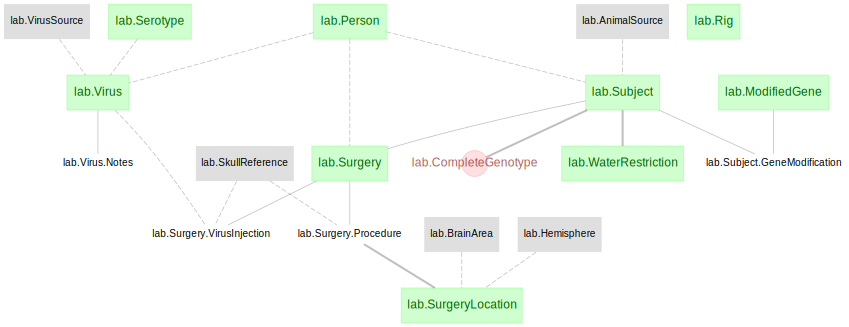

In [6]:
dj.ERD(lab)

In [7]:
import experiment

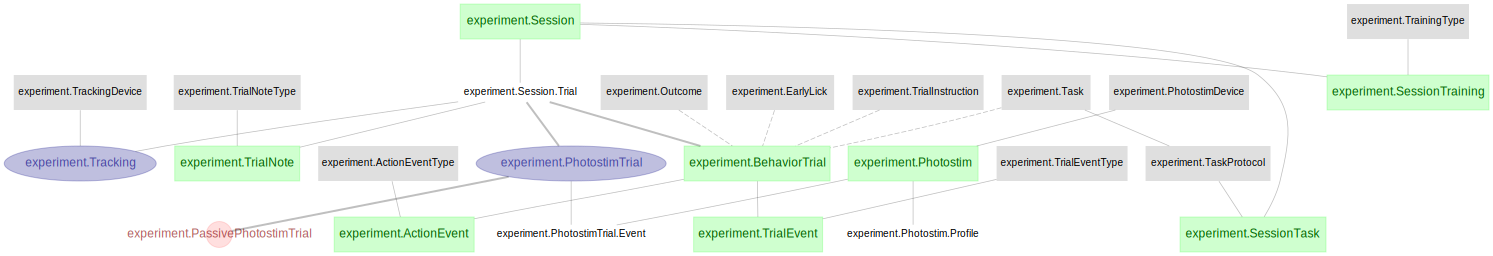

In [8]:
dj.ERD(experiment)

Connecting daveliu@mesoscale-activity.datajoint.io:3306


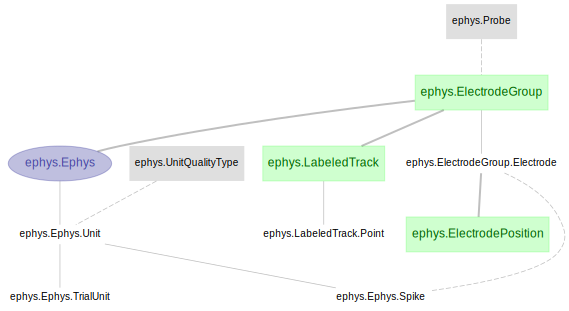

In [3]:
import ephys
dj.ERD(ephys)

In [9]:
import ingestBehavior

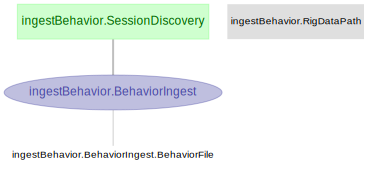

In [10]:
dj.ERD(ingestBehavior)

In [4]:
mapshell.discover()

FakeSubject_tw2_20171225_203225.mat skipped - no animal for FakeSubject
FakeSubject_tw2_20171225_204139.mat skipped - no animal for FakeSubject
FakeSubject_tw2_20171225_204403.mat skipped - no animal for FakeSubject
FakeSubject_tw2_20180108_132453.mat skipped - no animal for FakeSubject
FakeSubject_tw2_20180109_182454.mat skipped - no animal for FakeSubject
FakeSubject_tw2_20180110_151837.mat skipped - no animal for FakeSubject
FakeSubject_tw2_20180111_182716.mat skipped - no animal for FakeSubject
FakeSubject_tw2_20180113_164420.mat skipped - no animal for FakeSubject
FakeSubject_tw2_20180121_211609.mat skipped - no animal for FakeSubject
FakeSubject_tw2_20180126_221306.mat skipped - no animal for FakeSubject
FakeSubject_tw2_20180211_211929.mat skipped - no animal for FakeSubject
FakeSubject_tw2_20180211_223649.mat skipped - no animal for FakeSubject
FakeSubject_tw2_20180211_223946.mat skipped - no animal for FakeSubject
FakeSubject_tw2_20180211_224456.mat skipped - no animal for Fake

In [5]:
mapshell.populateB()

split session case detected for dl25 on 2018-02-25
split session case detected for dl25 on 2018-02-28
split session case detected for dl25 on 2018-03-07


In [ ]:
mapshell.populateE()

> c:\users\liul.hhmi\desktop\map-ephys\scripts\ingestephys.py(175)make()
-> ephys.Ephys.TrialUnit().insert(list(dict(ekey, unit = trialunits1[x], trial = trialunits2[x]) for x in range(0, len(trialunits2)))) # batch insert the TrialUnit (key, unit, trial)
400.0
0.0
247397
247397
> c:\users\liul.hhmi\desktop\map-ephys\scripts\ingestephys.py(176)make()
-> ephys.Ephys.Spike().insert(list(dict(ekey, unit = cluster_ids[x]-1, spike_time = spike_times2[x], electrode = viSite_spk[x], trial = spike_trials[x]) for x in range(0, len(spike_times2))), skip_duplicates=True) # batch insert the Spikes (key, unit, spike_time, electrode, trial)
400.0
0.0
5983290
5983290


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io as spio
import numpy as np

In [16]:
import ephys
trialNote = ephys.experiment.TrialNote()

In [19]:
animal = 407513
sessionN = 10

In [20]:
behaviorTrial = ephys.experiment.BehaviorTrial()

In [28]:
outcome = (behaviorTrial & {'subject_id': animal} & {'session': sessionN}).fetch('outcome', order_by='session')
early_lick = (behaviorTrial  & {'subject_id': animal} & {'session': sessionN}).fetch('early_lick', order_by='session')

In [29]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))

In [30]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1

In [31]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

Text(0,0.5,'Proportion Correct')

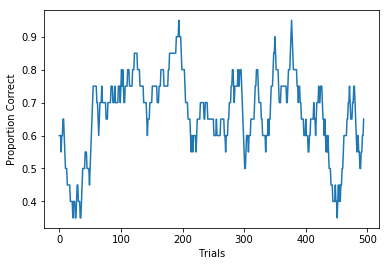

In [32]:
yMA = movingaverage(data,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')

Text(0,0.5,'Early Licks')

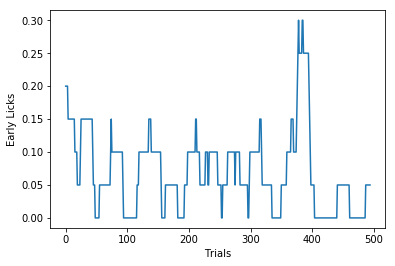

In [33]:
yMA = movingaverage(data1,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')